# Riffs
Provide at least three visualizations that combine the preceding model data in interesting ways.

These should provide insight into how features in the LIB table are related.

The nature of this relationship is left open to you -- it may be correlation, or mutual information, or something less well defined.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns; sns.set()
import sys
sys.path.append('/Users/lucyshichman/Documents/MSDS/DS5001/DS5001-2025-01-R/lessons/lib')
from hac2 import HAC

# settings
OHCO = ["book_id", "chap_id", "para_num", "sent_num", "token_num"]

bags = dict(
    SENTS = OHCO[:4],
    PARAS = OHCO[:3],
    CHAPS = OHCO[:2],
    BOOKS = OHCO[:1]
)

In [91]:
# import data tables
output_dir = "/Users/lucyshichman/Documents/MSDS/DS5001/final_project/woolf2vec/output"

TOKEN = pd.read_csv(f'{output_dir}/CORPUS.csv').set_index(OHCO)
VOCAB = pd.read_csv(f'{output_dir}/vocab.csv').set_index('term_str').dropna()
LIB = pd.read_csv(f"{output_dir}/lib.csv").set_index('book_id')

In [3]:
# generate BOOK level TFIDF table 

# create book level BOW
BOW = TOKEN.groupby(bags['BOOKS']+['term_str']).term_str.count().to_frame('n')

# create DTCM from BOW
DTCM = BOW.n.unstack(fill_value=0)

# compute TF
tf = {
    'sum': (DTCM.T / DTCM.T.sum()).T,
    'max': (DTCM.T / DTCM.T.max()).T,
    'log': (np.log2(1 + DTCM.T)).T,
    'raw':  DTCM,
    'double_norm': (DTCM.T / DTCM.T.max()).T,
    'binary': DTCM.T.astype('bool').astype('int').T
}
tf_method = 'sum'
TF = tf[tf_method]

# compute DF
DF = DTCM.astype('bool').sum() 

# compute IDF
N = DTCM.shape[0]
idf = {
    'standard': np.log2(N / DF),
    'max': np.log2(DF.max() / DF),
    'smooth': np.log2((1 + N) / (1 + DF)) + 1
}

idf_method = 'standard'
IDF = idf[idf_method]

# compute TFIDF
TFIDF = TF * IDF
TFIDF

term_str,1,10,1030,10th,112,1215,12th,1397,1580,1586,...,zone,zoo,zoological,zoology,zoom,zwinglers,à,éclair,éclairs,êtres
book_id,,,,,,,,,,,,,,,,,,,,,
BetweenTheActs,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000146,0.000000,0.000000,0.000000,0.000000,0.000000
Flush,0.000135,0.000193,0.000000,0.000000,0.000000,0.00000,0.000096,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JacobsRoom,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MrsDalloway,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000016,0.00000,0.000000,0.000000,0.000000,0.000052,0.000103,0.000052,0.000000
NightAndDay,0.000000,0.000000,0.000000,0.000000,0.000000,0.00002,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.00002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Orlando,0.000059,0.000000,0.000000,0.000042,0.000000,0.00000,0.000000,0.000000,0.000000,0.000042,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TheVoyageOut,0.000000,0.000000,0.000000,0.000000,0.000024,0.00000,0.000000,0.000000,0.000024,0.000000,...,0.000000,0.000015,0.00000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TheWaves,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000030,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TheYears,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000026,0.000000,0.000000,...,0.000018,0.000008,0.00000,0.000000,0.000000,0.000051,0.000000,0.000000,0.000000,0.000026


In [4]:
# compute correlation matrix
corr_type = 'kendall'
CORR_MATRIX = TFIDF.T.corr(corr_type)

In [5]:
# hierarchical cluster diagram
CORR = CORR_MATRIX.stack().to_frame('r').sort_index()
X = CORR['r'].unstack()

In [101]:
LIB['year_label'] = LIB['title'] + ' (' + LIB['year'].astype(str) + ')'
LIB['goodreads_label'] = LIB['title'] + ' (' + LIB['goodreads'].astype(str) + ')'
LIB['film_label'] = LIB['title'] + ' (' + LIB['adapted_to_film'].astype(str) + ')'

## Riff #1: Hierarchical Cluster Diagrams

<Figure size 640x480 with 0 Axes>

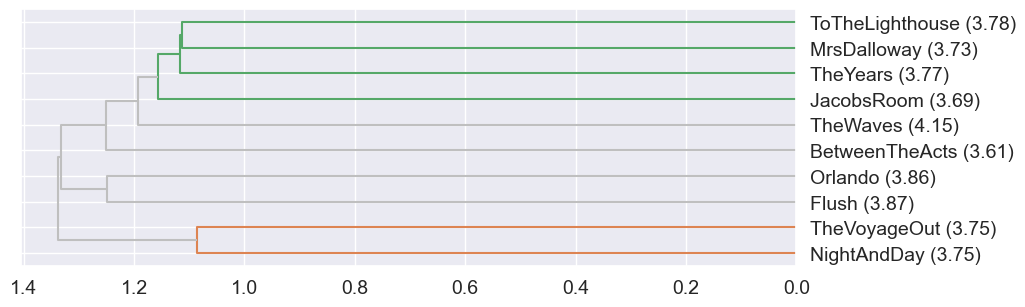

In [7]:
fig = HAC(X, labels=LIB.goodreads_label.to_list())
fig.color_thresh = 1.19
fig.plot()

<Figure size 640x480 with 0 Axes>

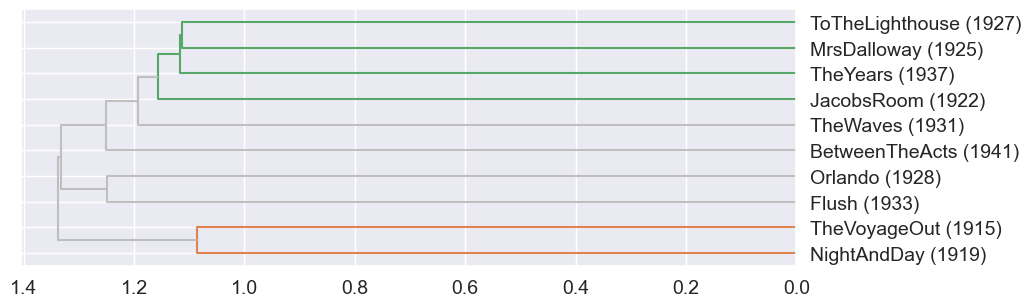

In [8]:
fig = HAC(X, labels=LIB.year_label.to_list())
fig.color_thresh = 1.19
fig.plot()

<Figure size 640x480 with 0 Axes>

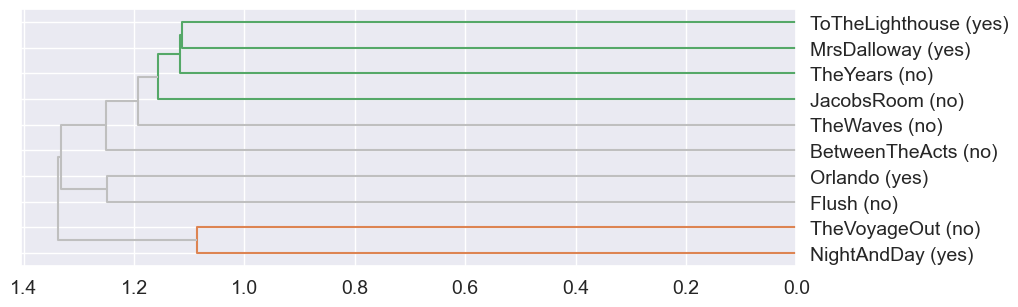

In [102]:
fig = HAC(X, labels=LIB.film_label.to_list())
fig.color_thresh = 1.19
fig.plot()

## Riff 2: Syuzhet plots

In [27]:
from pyzhet import SyuzhetBook, Transforms
from textblob import Blobber
import matplotlib.pyplot as plt
import json

file_path = '/Users/lucyshichman/Documents/MSDS/DS5001/final_project/woolf2vec/woolf_novels/utf8'

<Axes: title={'center': 'Between The Acts (1941) DCT'}>

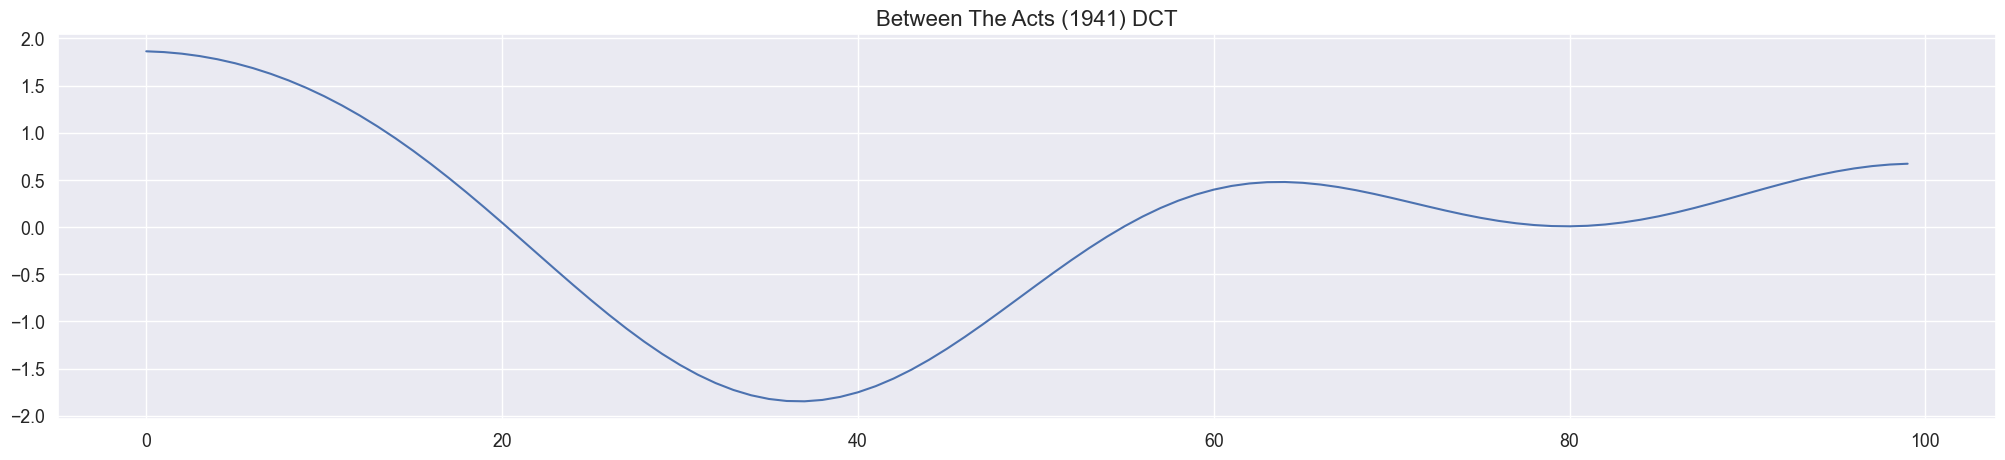

In [28]:
# Between The Acts
blobber = Blobber()
TB_BetweenTheActs = blobber(open(f'{file_path}/BetweenTheActs.utf8.txt', 'r').read())
DOC_BetweenTheActs = pd.DataFrame(json.loads(TB_BetweenTheActs.to_json()))
DOC_BetweenTheActs.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_BetweenTheActs.polarity, 'Between The Acts (1941)').plot_smooth(low_pass_size=6)

<Axes: title={'center': 'Flush (1933) DCT'}>

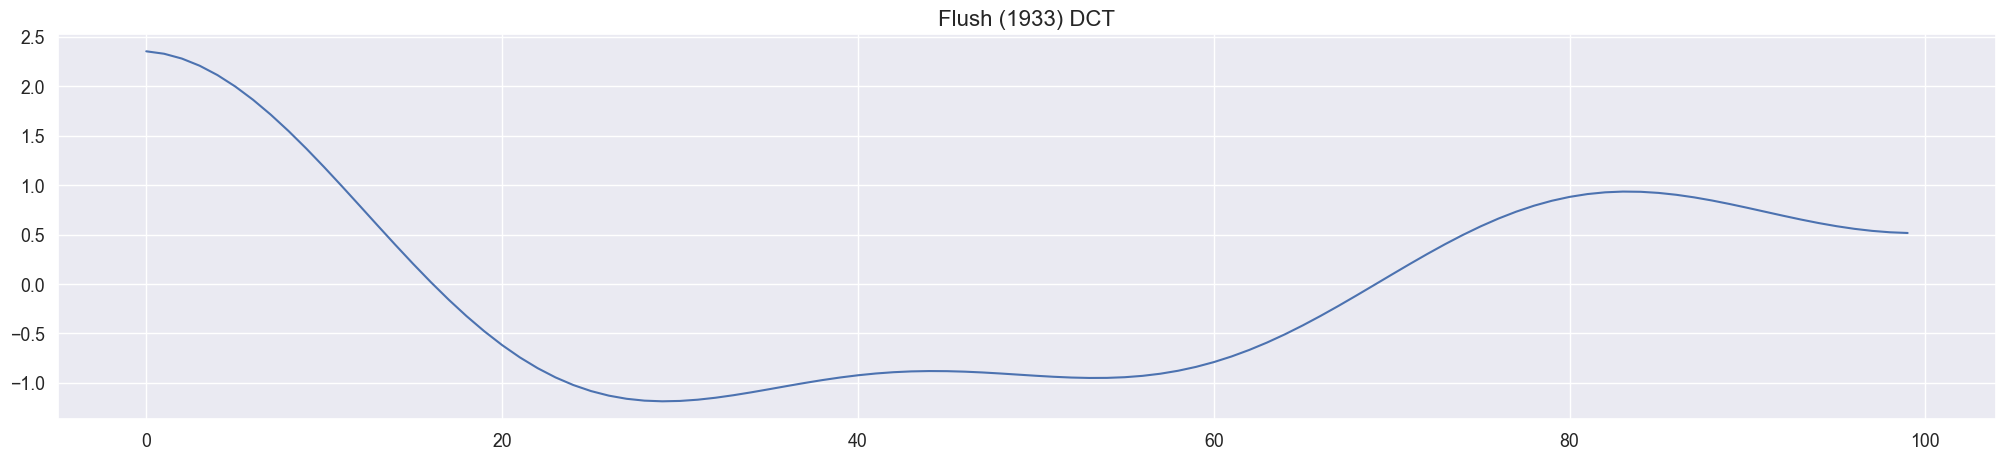

In [29]:
# Flush
blobber = Blobber()
TB_Flush = blobber(open(f'{file_path}/Flush.utf8.txt', 'r').read())
DOC_Flush = pd.DataFrame(json.loads(TB_Flush.to_json()))
DOC_Flush.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_Flush.polarity, 'Flush (1933)').plot_smooth(low_pass_size=6)

<Axes: title={'center': "Jacob's Room (1922) DCT"}>

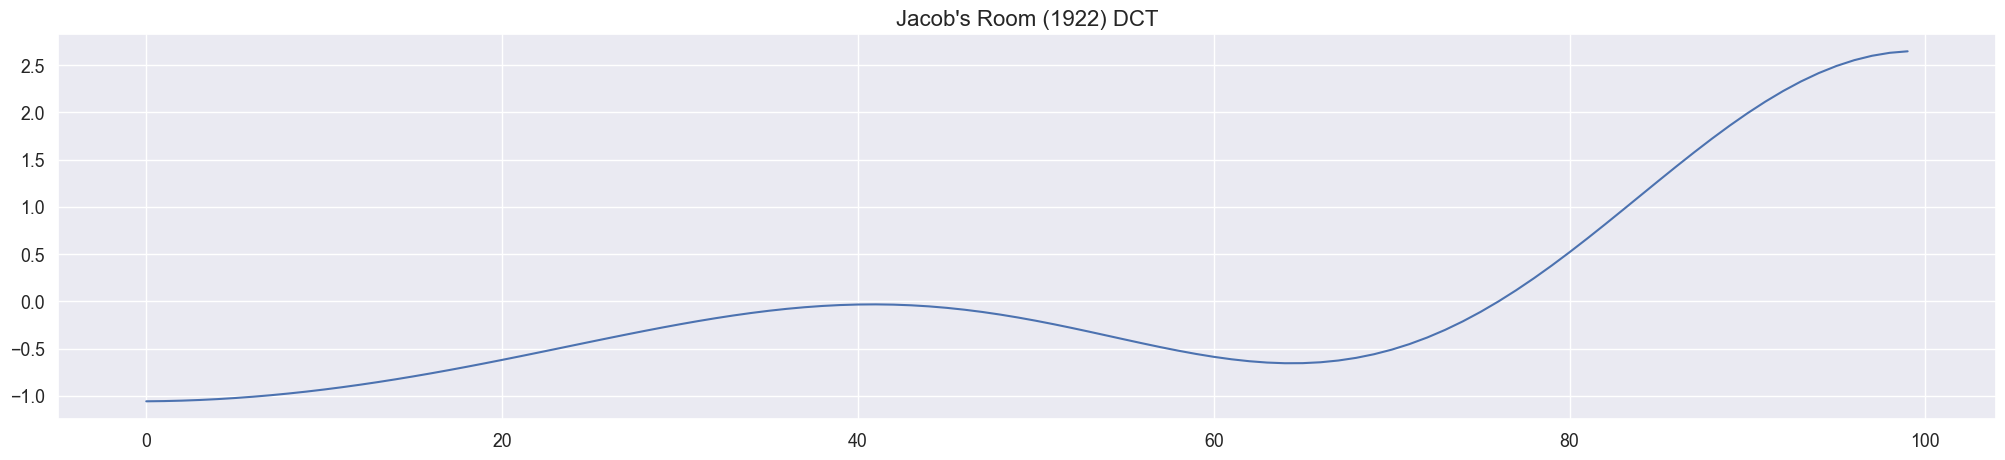

In [30]:
# Jacob's Room
blobber = Blobber()
TB_JacobsRoom = blobber(open(f'{file_path}/JacobsRoom.utf8.txt', 'r').read())
DOC_JacobsRoom = pd.DataFrame(json.loads(TB_JacobsRoom.to_json()))
DOC_JacobsRoom.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_JacobsRoom.polarity, "Jacob's Room (1922)").plot_smooth(low_pass_size=6)

<Axes: title={'center': 'Mrs. Dalloway (1925) DCT'}>

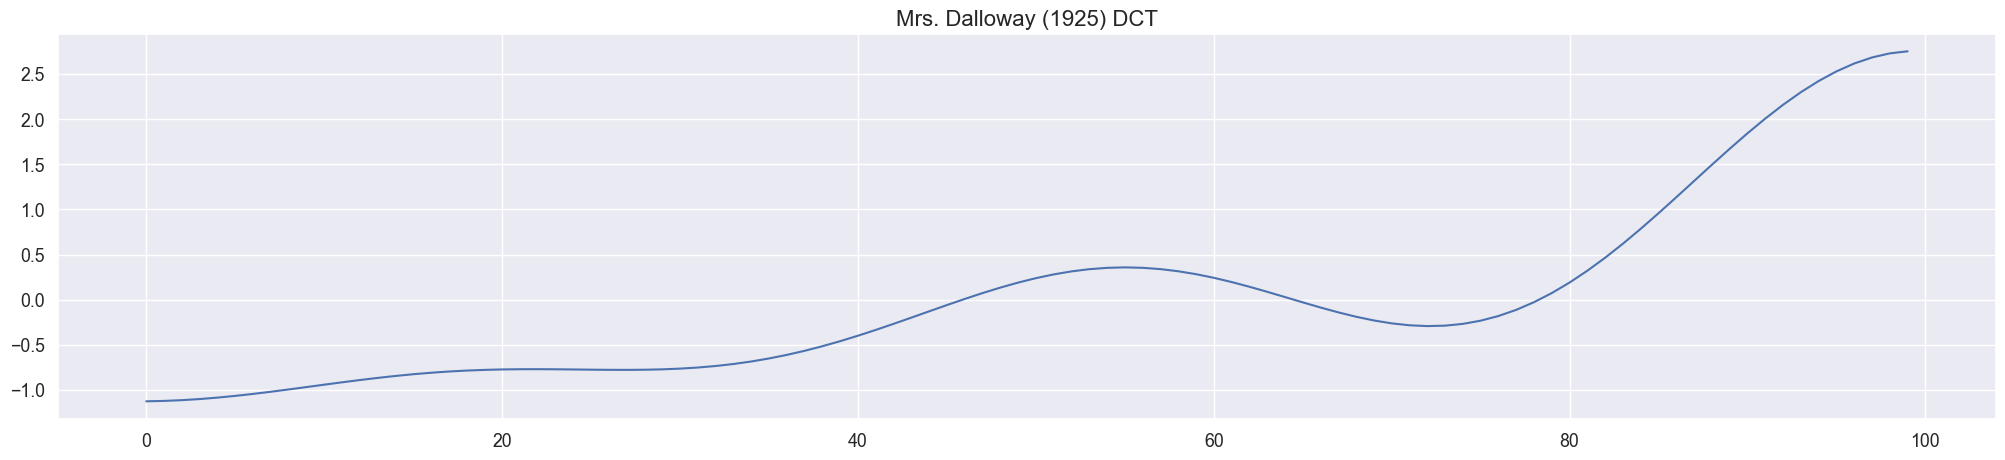

In [31]:
# Mrs. Dalloway
blobber = Blobber()
TB_MrsDalloway = blobber(open(f'{file_path}/MrsDalloway.utf8.txt', 'r').read())
DOC_MrsDalloway = pd.DataFrame(json.loads(TB_MrsDalloway.to_json()))
DOC_MrsDalloway.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_MrsDalloway.polarity, "Mrs. Dalloway (1925)").plot_smooth(low_pass_size=6)

<Axes: title={'center': 'Night And Day (1919) DCT'}>

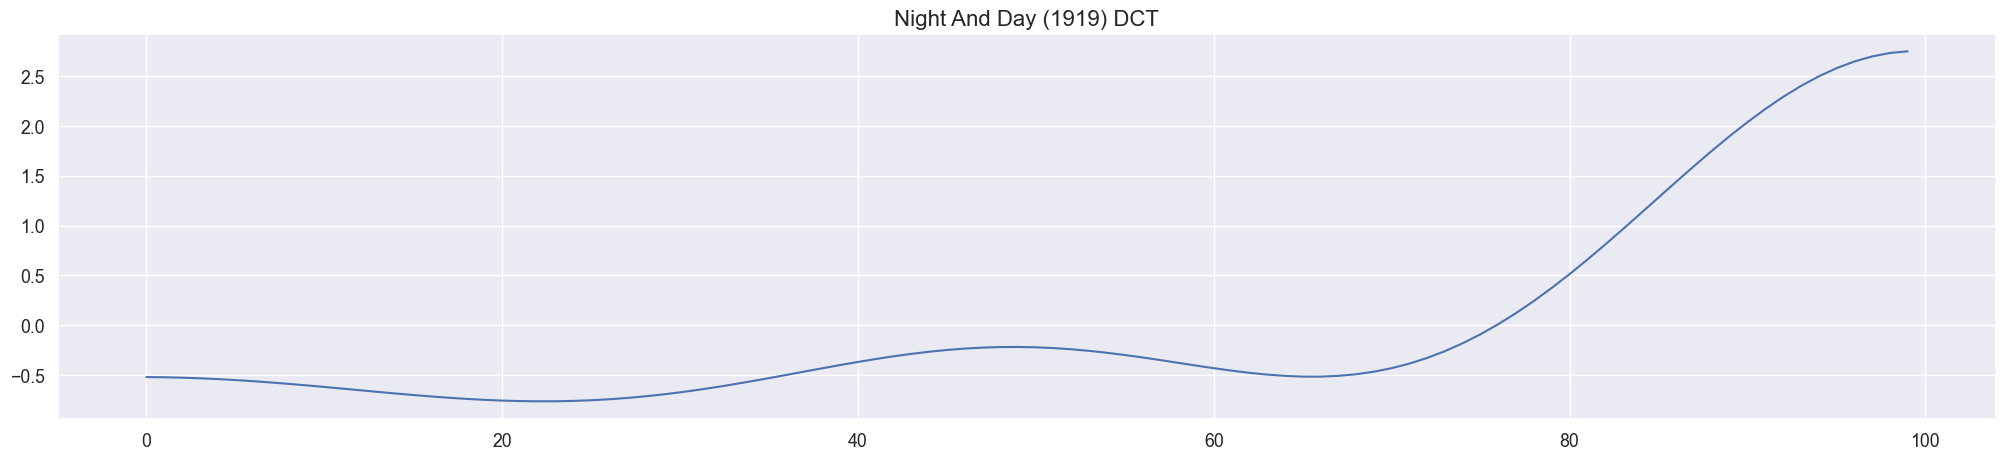

In [32]:
# Night and Day
blobber = Blobber()
TB_NightAndDay = blobber(open(f'{file_path}/NightAndDay.utf8.txt', 'r').read())
DOC_NightAndDay = pd.DataFrame(json.loads(TB_NightAndDay.to_json()))
DOC_NightAndDay.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_NightAndDay.polarity, "Night And Day (1919)").plot_smooth(low_pass_size=6)

<Axes: title={'center': 'Orlando (1928) DCT'}>

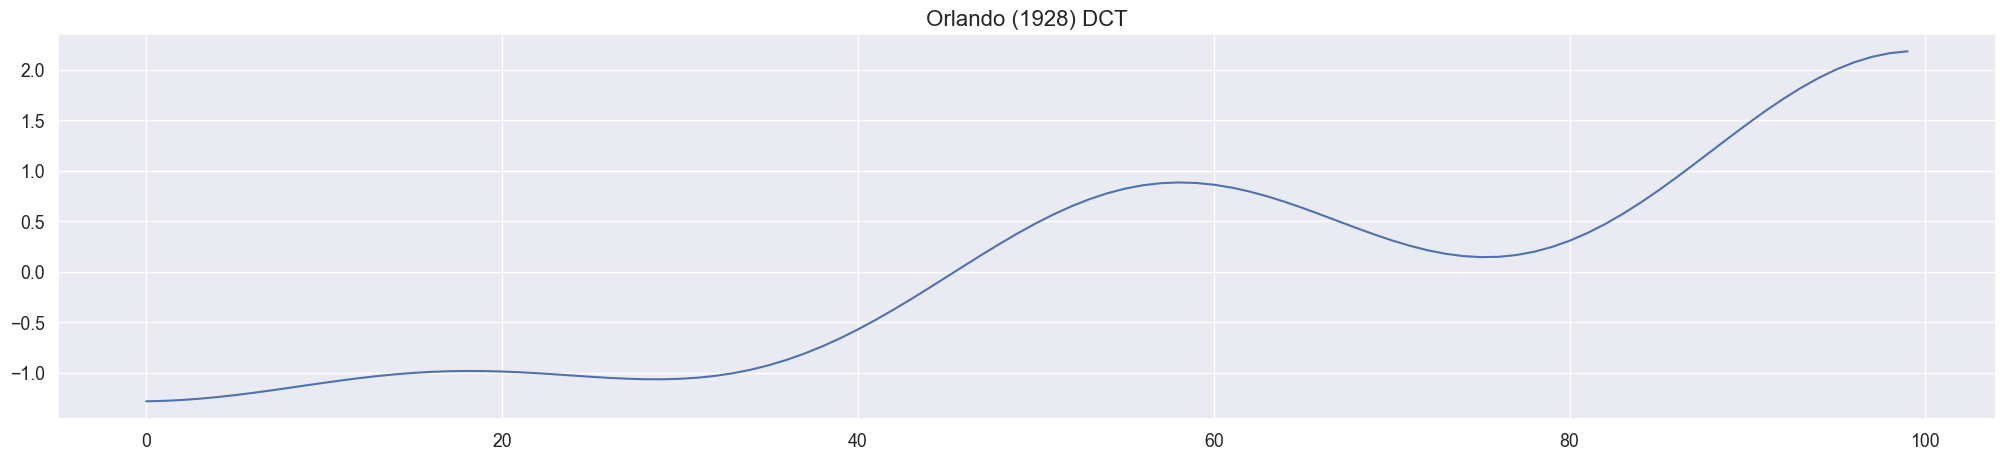

In [33]:
# Orlando
blobber = Blobber()
TB_Orlando = blobber(open(f'{file_path}/Orlando.utf8.txt', 'r').read())
DOC_Orlando = pd.DataFrame(json.loads(TB_Orlando.to_json()))
DOC_Orlando.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_Orlando.polarity, "Orlando (1928)").plot_smooth(low_pass_size=6)

<Axes: title={'center': 'The Voyage Out (1915) DCT'}>

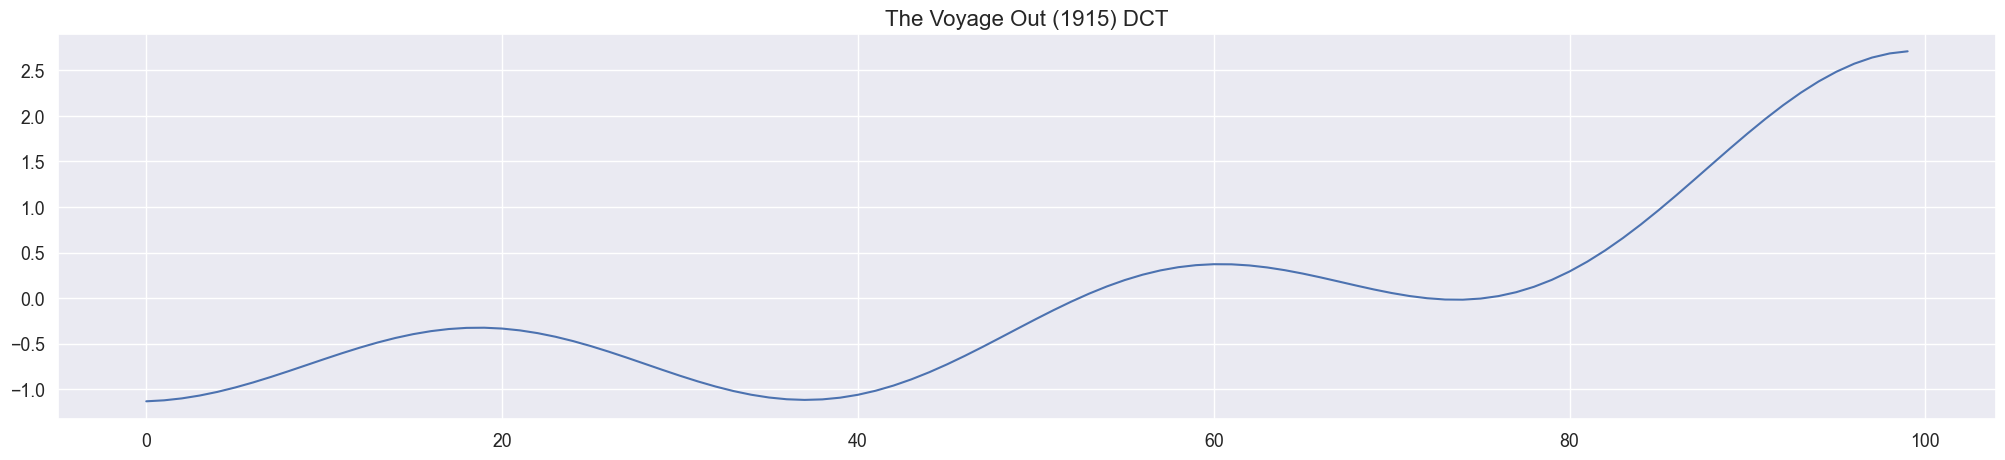

In [34]:
# The Voyage Out
blobber = Blobber()
TB_TheVoyageOut = blobber(open(f'{file_path}/TheVoyageOut.utf8.txt', 'r').read())
DOC_TheVoyageOut = pd.DataFrame(json.loads(TB_TheVoyageOut.to_json()))
DOC_TheVoyageOut.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_TheVoyageOut.polarity, "The Voyage Out (1915)").plot_smooth(low_pass_size=6)

<Axes: title={'center': 'The Waves (1931) DCT'}>

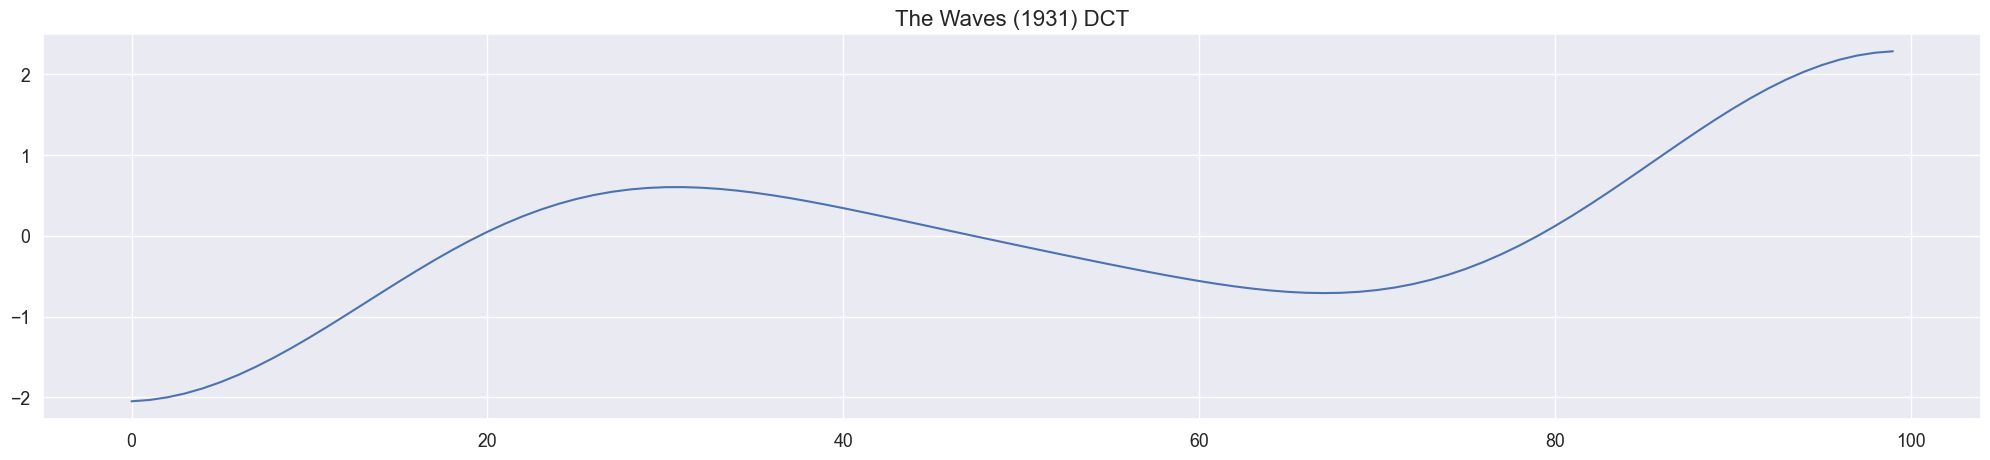

In [35]:
# The Waves
blobber = Blobber()
TB_TheWaves = blobber(open(f'{file_path}/TheWaves.utf8.txt', 'r').read())
DOC_TheWaves = pd.DataFrame(json.loads(TB_TheWaves.to_json()))
DOC_TheWaves.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_TheWaves.polarity, "The Waves (1931)").plot_smooth(low_pass_size=6)

<Axes: title={'center': 'The Years (1937) DCT'}>

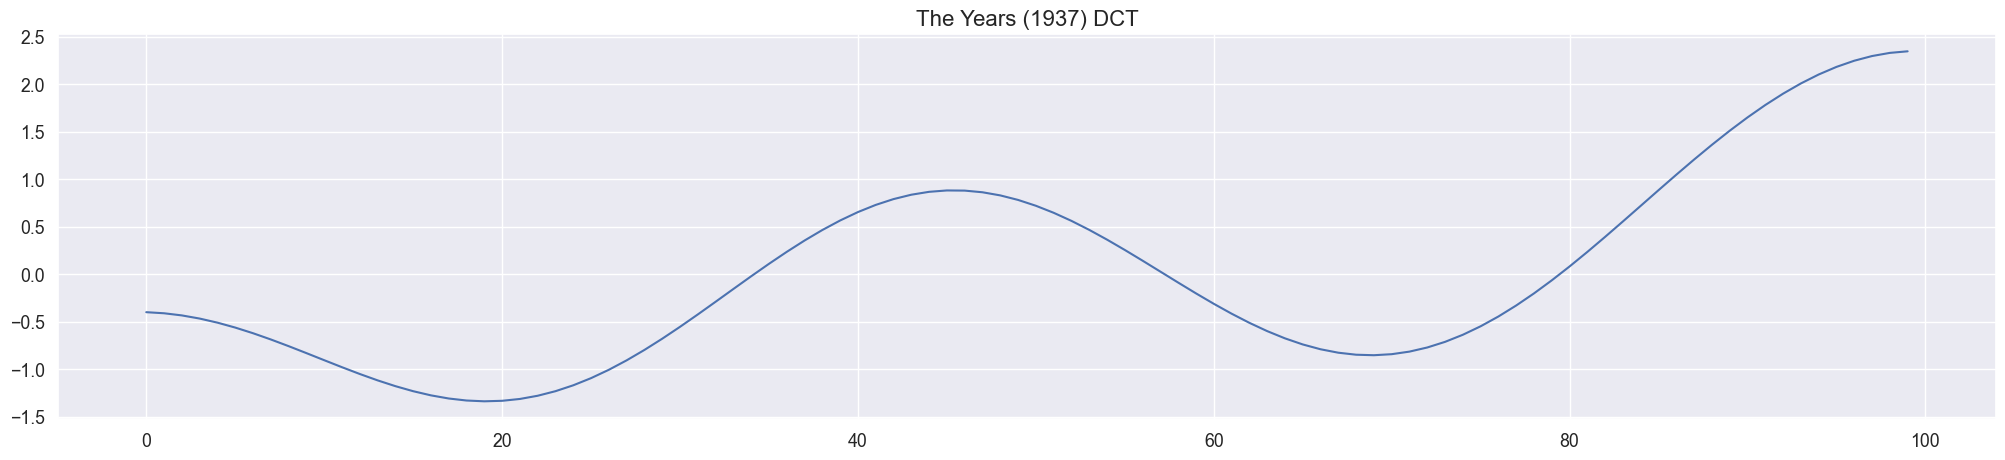

In [36]:
# The Years
blobber = Blobber()
TB_TheYears = blobber(open(f'{file_path}/TheYears.utf8.txt', 'r').read())
DOC_TheYears = pd.DataFrame(json.loads(TB_TheYears.to_json()))
DOC_TheYears.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_TheYears.polarity, "The Years (1937)").plot_smooth(low_pass_size=6)

<Axes: title={'center': 'To The Lighthouse (1927) DCT'}>

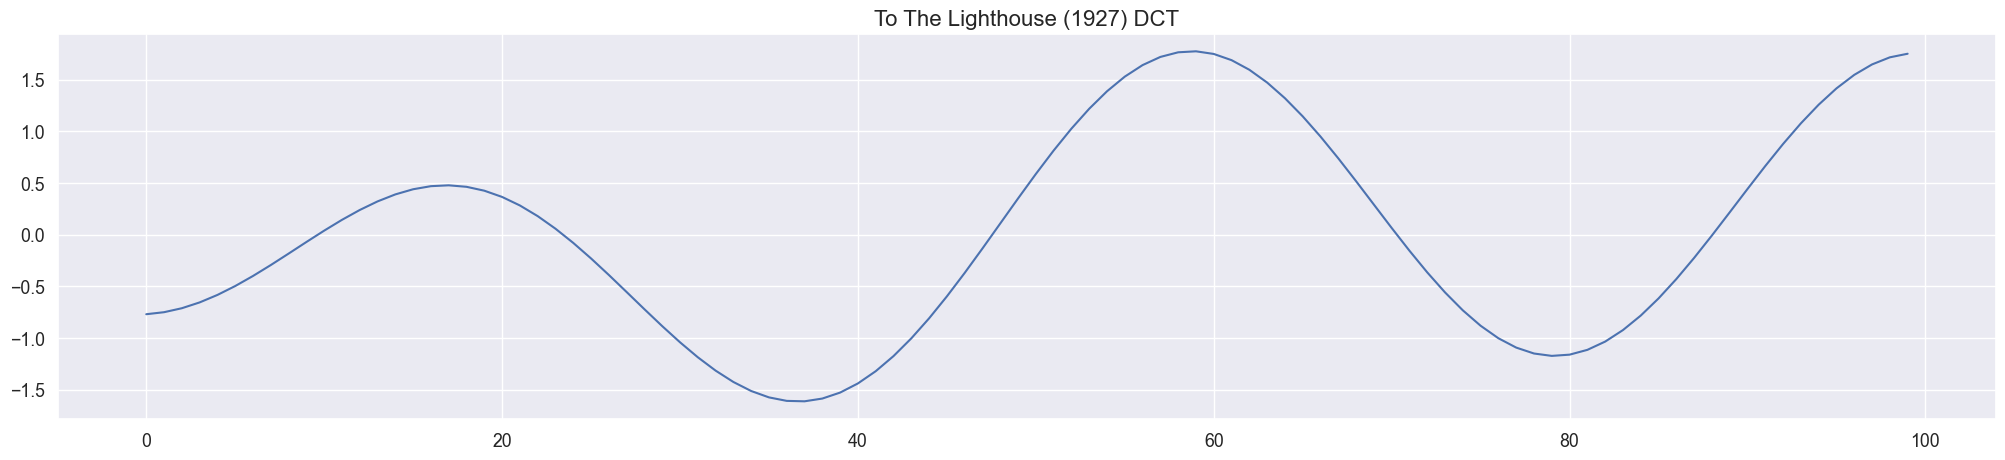

In [37]:
# To The Lighthouse
blobber = Blobber()
TB_ToTheLighthouse = blobber(open(f'{file_path}/ToTheLighthouse.utf8.txt', 'r').read())
DOC_ToTheLighthouse = pd.DataFrame(json.loads(TB_ToTheLighthouse.to_json()))
DOC_ToTheLighthouse.index.name = 'sent_id'

# plot
SyuzhetBook(DOC_ToTheLighthouse.polarity, "To The Lighthouse (1927)").plot_smooth(low_pass_size=6)

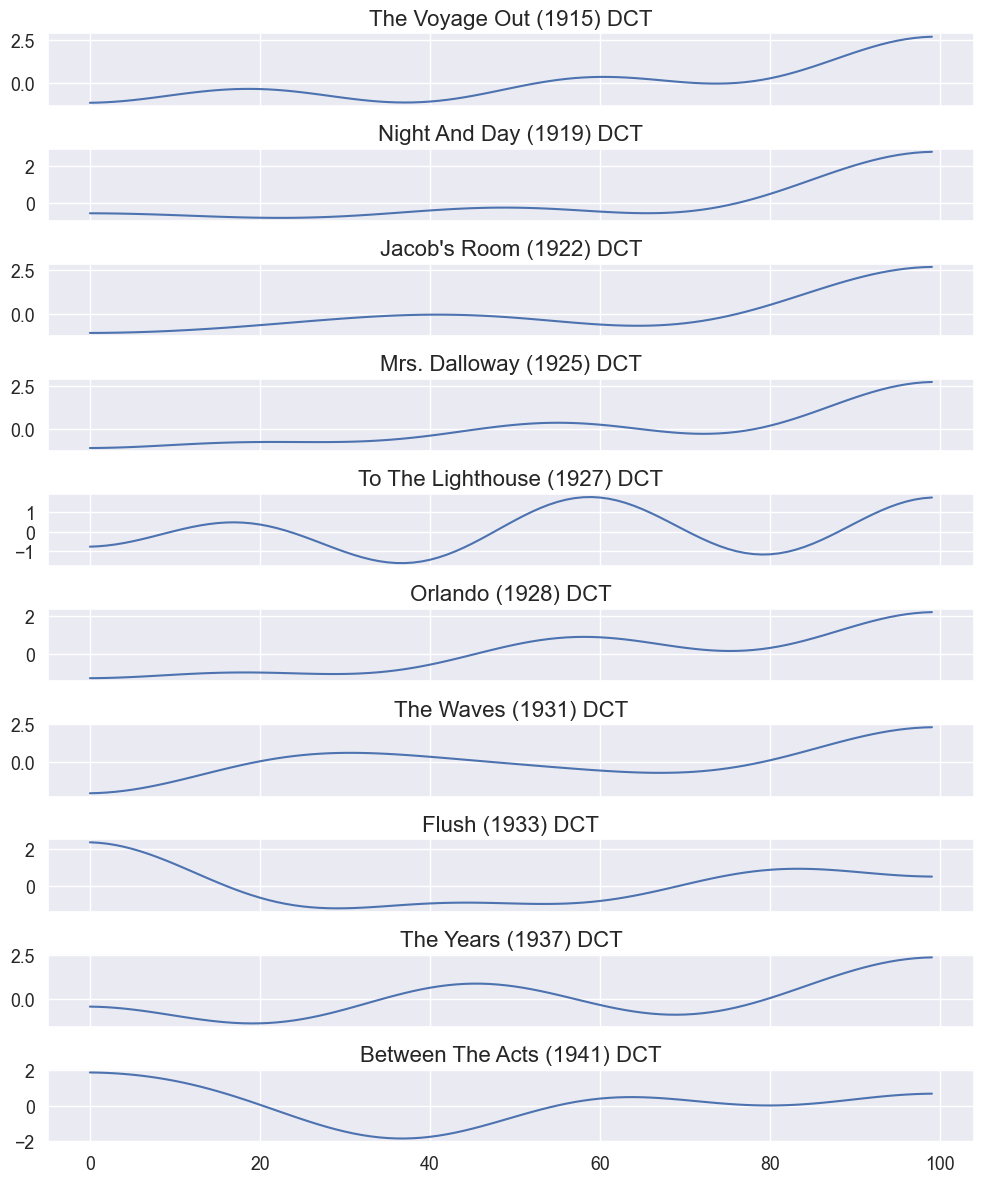

In [40]:
# composite plot ordered by year

fig, ax_dict = plt.subplot_mosaic(
    [["voyage"], ["night"], ["jacob"],
     ["mrs"], ["lighthouse"], ["orlando"],
     ["waves"], ["flush"], ["years"], ["between"]    
    ],
    figsize=(10, 12),
    sharex=True
)

SyuzhetBook(DOC_TheVoyageOut.polarity, "The Voyage Out (1915)").plot_smooth(ax=ax_dict["voyage"], low_pass_size=6)
SyuzhetBook(DOC_NightAndDay.polarity, "Night And Day (1919)").plot_smooth(ax=ax_dict["night"], low_pass_size=6)
SyuzhetBook(DOC_JacobsRoom.polarity, "Jacob's Room (1922)").plot_smooth(ax=ax_dict["jacob"], low_pass_size=6)
SyuzhetBook(DOC_MrsDalloway.polarity, "Mrs. Dalloway (1925)").plot_smooth(ax=ax_dict["mrs"], low_pass_size=6)
SyuzhetBook(DOC_ToTheLighthouse.polarity, "To The Lighthouse (1927)").plot_smooth(ax=ax_dict["lighthouse"], low_pass_size=6)
SyuzhetBook(DOC_Orlando.polarity, "Orlando (1928)").plot_smooth(ax=ax_dict["orlando"], low_pass_size=6)
SyuzhetBook(DOC_TheWaves.polarity, "The Waves (1931)").plot_smooth(ax=ax_dict["waves"], low_pass_size=6)
SyuzhetBook(DOC_Flush.polarity, "Flush (1933)").plot_smooth(ax=ax_dict["flush"], low_pass_size=6)
SyuzhetBook(DOC_TheYears.polarity, "The Years (1937)").plot_smooth(ax=ax_dict["years"], low_pass_size=6)
SyuzhetBook(DOC_BetweenTheActs.polarity, "Between The Acts (1941)").plot_smooth(ax=ax_dict["between"], low_pass_size=6)

plt.tight_layout()
plt.show()

## Riff #3: Scatter plot

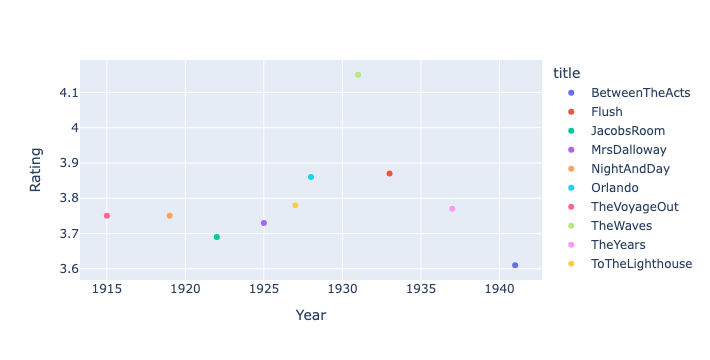

In [70]:
px.scatter(
    LIB,
    x="year",
    y="goodreads",           # optional
    color = 'title',         # adds line of best fit
    labels={"year": "Year", "goodreads": "Rating"}
)


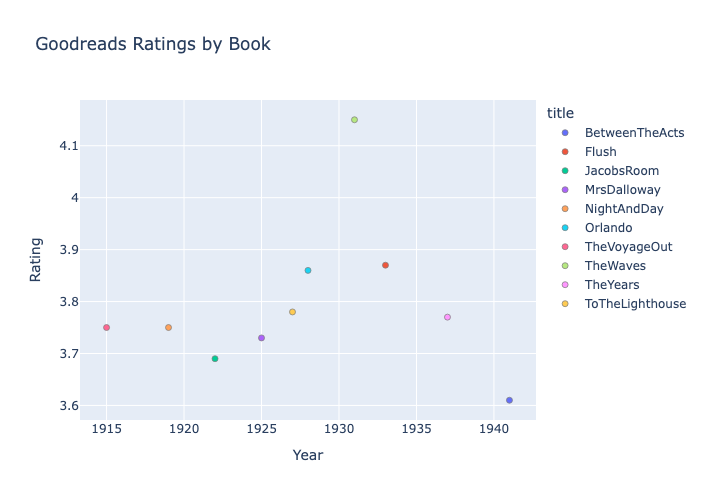

In [104]:
fig = px.scatter(
    LIB,
    x="year",
    y="goodreads",
    color="title",
    labels={"year": "Year", "goodreads": "Rating"},
    title="Goodreads Ratings by Book",
    height = 500
)

fig.update_traces(marker=dict(line=dict(width=0.75, color='gray')))

fig.show()


## Riff 4: Working with adapted_to_film

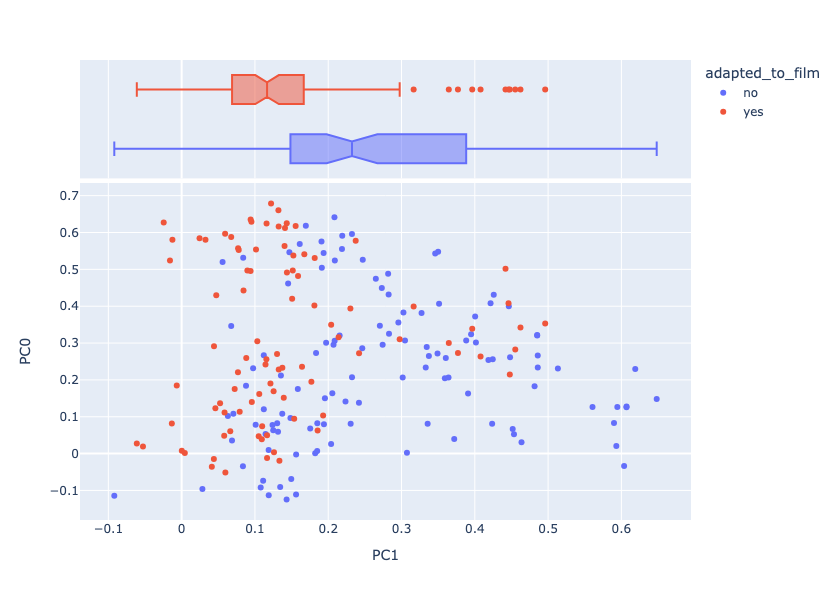

In [103]:
# PCA visualization
from scipy.linalg import eigh
norm_docs = False 
center_term_vectors = False
TFIDF_L2 = pd.read_csv(f'{output_dir}/tfidf_l2.csv').set_index(['book_id', 'chap_id'])

# computing covariance matrix
COV = TFIDF_L2.cov()

# decompose matrix
eig_vals, eig_vecs = eigh(COV)

# convert eigen data to datagrames
EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
EIG_VAL.index.name = 'term_str'

# combine eigenvalues and eigenvectors
EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)

# compute explained variance
EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)

# pick top 10 components based on explained variance
COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(10).reset_index(drop=True)
COMPS.index.name = 'comp_id'
COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
COMPS.index.name = 'pc_id'

# compute loadings (contribution of each term to the component)
LOADINGS = COMPS[COV.index].T
LOADINGS.index.name = 'term_str'

# compute top terms for each component
top_terms = []
for i in range(10):
    for j in [0, 1]:
        comp_str = ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(5).index.to_list())
        top_terms.append((f"PC{i}", j, comp_str))
COMP_GLOSS = pd.DataFrame(top_terms).set_index([0,1]).unstack()
COMP_GLOSS.index.name = 'comp_id'
COMP_GLOSS.columns = COMP_GLOSS.columns.droplevel(0) 
COMP_GLOSS = COMP_GLOSS.rename(columns={0:'pos', 1:'neg'})

# project docs onto components to create document-component matrix
DCM = TFIDF_L2.dot(LOADINGS) 

# add meta data
LIB_COLS = ['title', 'year','goodreads', 'adapted_to_film']
DCM = DCM.join(LIB[LIB_COLS], on='book_id')

# define a doc field to name each chapter
DCM['doc'] = DCM.apply(lambda x: f"{x.title} {str(x.name[1]).zfill(2)}", 1)

# visualization function
def vis_pcs(M, a, b, label='title', hover_name='doc', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=600)

def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VOCAB)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', marginal_x='box', height=800)

vis_pcs(DCM, 1, 0, label='adapted_to_film')